<a href="https://colab.research.google.com/github/zahid-bracu/feature-engineering/blob/main/Part_1_2_Feature_Scaling_%7C%7C_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Docs : https://docs.google.com/document/d/17_ZPqy6qpR5GkPa3Rqsc2IPwRVSj-VCZVMi8jZ3RaqU/edit?usp=sharing

###Imporing Essential Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

###Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your CSV file
file_path = '/content/drive/My Drive/Datas/Social_Network_Ads.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


###Separting Essential Columns for model Build up

In [ ]:
columns_to_copy = ['Age','EstimatedSalary','Purchased']
df = df[columns_to_copy]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


###Original Data Description

In [ ]:
np.round(df.describe(),1)

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,37.7,69742.5,0.4
std,10.5,34097.0,0.5
min,18.0,15000.0,0.0
25%,29.8,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


###Train & Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

###Feature Scaling : Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Mean value check of the X_train Data :

এখানে array এর ১ম value টা হচ্ছে age এর mean
২য় টা হচ্ছে estimated salary এর mean


In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

###Checking the Scaled Data

এখন যদি X_train_scaled Data check করে দেখি তাহলে দেখতে পাবো data গুলো numpy array আকারে আছে ।

In [ ]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

###Making the Scaled Numpy Array Data to Pandas DF

কিন্তু Data গুলোকে model এ fit করানোর জন্য তাকে pandas dataframe হিসেবে বানাতে হবে

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


###Checking the Mean, Std, Min Max of Unscaled Data :

* এখন যদি আমরা পুরনো unscaled data এর mean , standard deviation ইত্যাদি দেখি বা check করি
* এখানে আমরা দেখতে পাই mean, standard deviation এর value অনেক বেশি এবং Data গুলার মাঝে পার্থক্য আছে


In [ ]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


###Checking the Mean, Std, Min Max of scaled Data

* এখন যদি আমরা নতুন  scaled data এর mean , standard deviation ইত্যাদি দেখি বা check করি
* এখানে আমরা দেখতে পাই mean, standard deviation । mean এর value zero আর standard deviation one এবং Data গুলার মাঝে পার্থক্য নেই খুব একটা ।  

In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


###Scatter Plot of Data : Before & After Scaling

* এরপর আমরা যদি X train Scaled Data ও X train unscaled Data নিয়ে scattered plot draw করি তাহলে দেখতে পাই যে unscaled data এর data point গুলো একটি আরেকটি থেকে same distance এ আছে scaled data point গুলোর ক্ষেত্রেও।


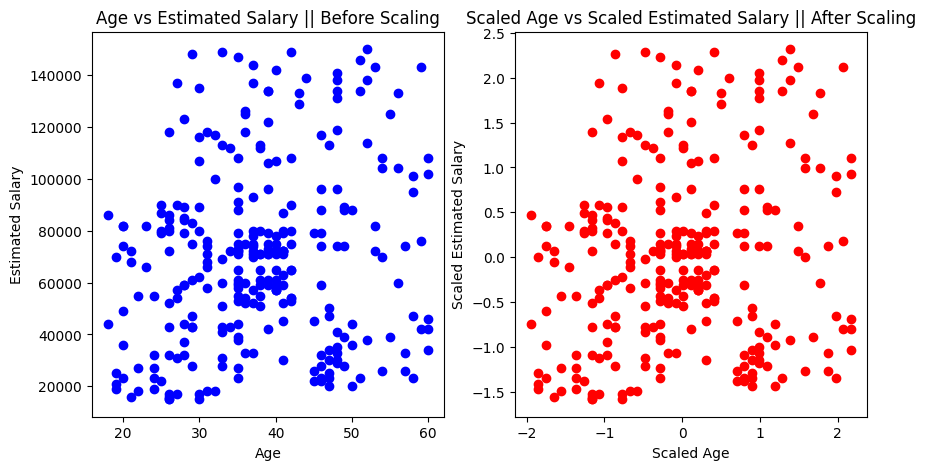

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for the first subplot
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'], c='blue', alpha=1)
ax1.set_title('Age vs Estimated Salary || Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

# Scatter plot for the second subplot
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], c='red', alpha=1)
ax2.set_title('Scaled Age vs Scaled Estimated Salary || After Scaling')
ax2.set_xlabel('Scaled Age')
ax2.set_ylabel('Scaled Estimated Salary')

# Displaying the plots
plt.show()


* এমনকি ডাটা এর shape ও same । scaled data এর ক্ষেত্রে লক্ষ করলে দেখতে পারি Scaled age এর middled value zero and scaled estimated salary এর middle point value zero. এর অর্থ হলো যে Data গুলো scaled হয়ে zero-centric হয়েছে অর্থাৎ zero এর আশে পাশে center হয়েছে।

###KDE Plot of Data : Before & After Scaling

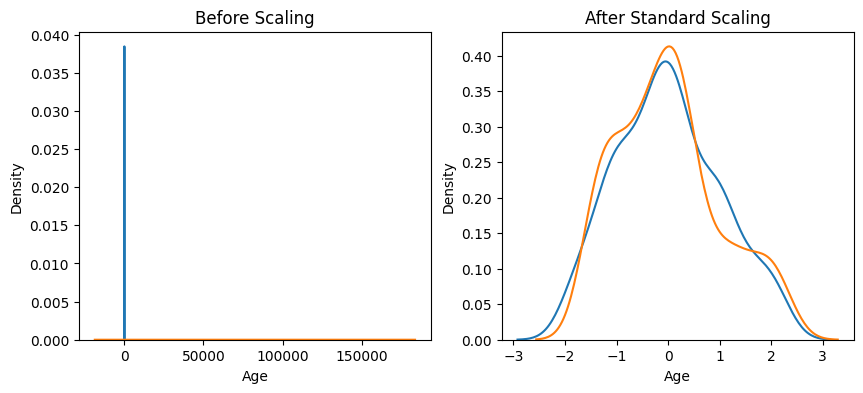

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

* Unscaled data গুলো এর মাঝে distributed density এর অনেক পার্থক্য অনেক বেশি - Age ও estimated Salary এর KDE/PDE থেকে দেখতে পাচ্ছি যে Age এর (blue) এর distribution density  এর  range x-axis বরাবর অনেক কম । আর estimated salary (yellow) এর distributed density এর range x-axis বরাবর  অনেক বেশি। মানে এদের মাঝে distribution density এর  range এর পার্থক্য ও অনেক বেশি । এদের মাঝে comparison ও হয় না
এবার যদি আমরা scaled data  গুলোর দিকে যদি দেখি তাহলে দেখতে পাব Age ও Estimated Salary এর মাঝে distributed density range এ খুব একটা পার্থক্য নেই। এর মানে data গুলোর distributed density range কাছা কাছি আছে। এবং scaled data তে দেখা যাচ্ছে zero এর উপর বা আশে পাশে ২ ধরনের data রি density বা distribution অনেক বেশি । এজন্য এ থেকে বুঝতে পারি যে আমাদের data গুলোর mean zero অ্যান্ড data গুলো zero centric হুয়েছে।


###KDE Plot only for Age : Before & After Scaling

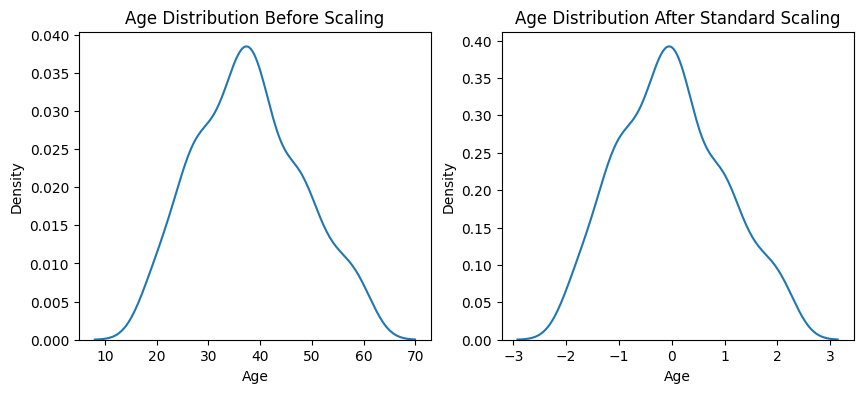

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

* এখন যদি আমরা শুধু Age এর Density Distribution দেখার জন্য PDE plot Draw করি তাহলে দেখতে পারি
* যে unscaled Age Data গুলোতে data এর যে distribution shape রয়েছে ঠিক তেমনি Age এর scaled data এর ক্ষেত্রেও same distribution shape রয়েছে । অর্থাৎ scale করার পর data এর  distribution  same থাকে । শুধু মাত্র Data গুলোর mean zero হয়েছে এবং standard distribution 1 হয়েছে। ও Data গুলো mean centric হয়েছে

###KDE Plot only for Salary : Before & After Scaling

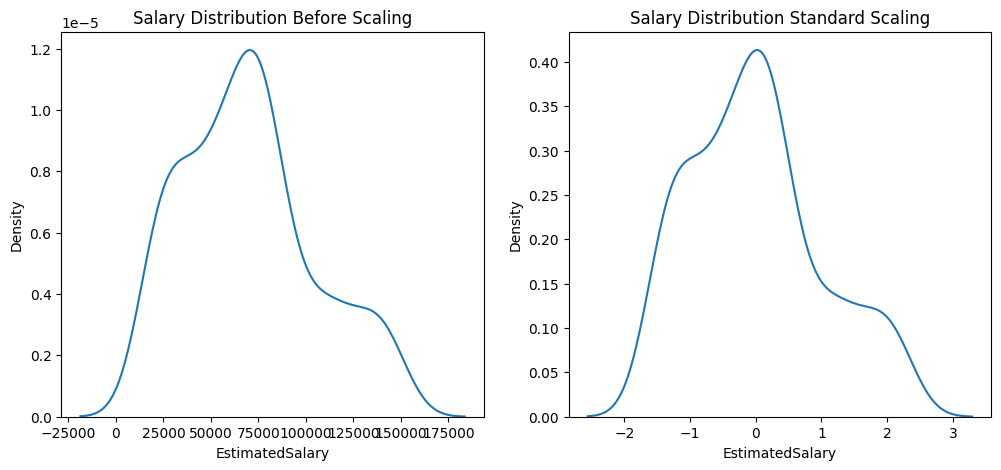

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

তেমনি যদি আমরা estimated salary এর data গুলো খেয়াল করি আমরা same দেখতে পাবো
যে estiamted salary এর data গুলো scale করার পর ও data এর shape same রয়েছে  

###Logistic Regression

এবার যদি আমরা unscaled data logistic regression চালাই যেখানে age, estimated salary input data আর purchased output বা predicted data হবে সেখানে আমরা দেখতে পারি যে unscaled data এর ক্ষেত্রে
* Accuracy Score : 0.6583333333333333

আর এবার scaled data দিয়ে logistic regression চালাই তবে আমরা দেখতে পারি যে
* scaled data এর ক্ষেত্রে
Accuracy Score : 0.8666666666666667

অর্থাৎ data scale করার ফলে machine learning model এর accuracy বৃদ্ধি পেয়েছে।


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


###Decision Tree

Decision Tree তে data scale করলেও accuracy তে তেমন পার্থক্য হয় না। scaled data and unscaled data ২ ক্ষেত্রেই same accuracy প্রদান করে বা দেয়

* Actual 0.875
* Scaled 0.875

তেমন কিছু কিছু algorithm model আছে যাদের use করলে scaled বা unscaled data এর ক্ষেত্রে তেমন কোন পার্থক্য আসে না ।


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


##Outlier Effect

এবার Data তে কিছু Outlier Data add করে দেখবো যে outlier data থাকলে standardization এর পর Data এর shape এর কোন change হওয় কিনা

###Data Add

In [ ]:
df2 = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
df_new = pd.concat([df, df2], ignore_index=True)
df_new

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


এখন plot করে দেখবো data add করার পর data এর scattered ploting কেমন হয়েছে

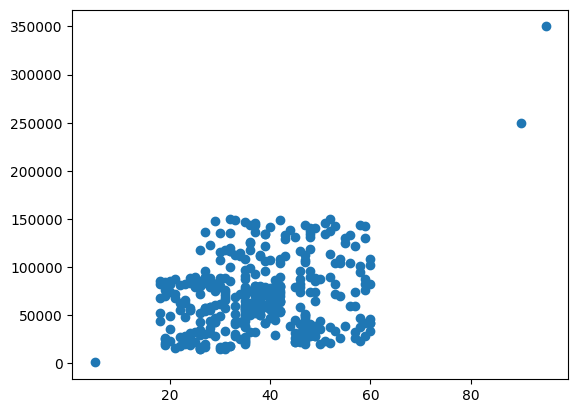

In [ ]:
plt.scatter(df_new['Age'], df_new['EstimatedSalary'])

Data add করার পর Scatter plot এ outlier এর data গুলাকে আমরা bottom and top এ distance এ দেখতে পাচ্ছি

###Train & Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('Purchased', axis=1),
                                                    df_new['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

###Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

###Show Data in Scatter Diagram

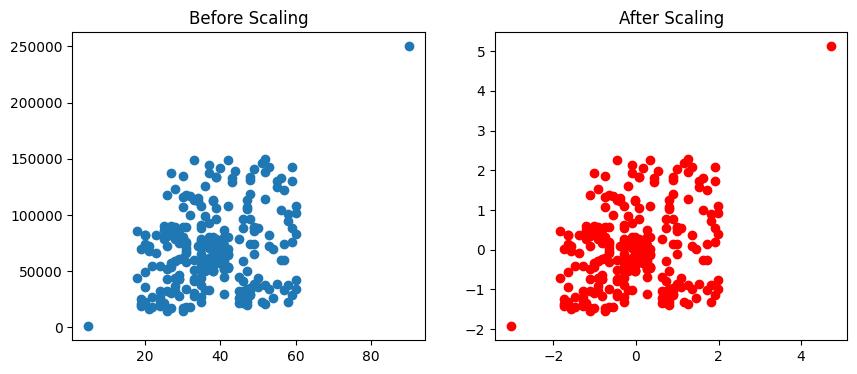

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()